In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
# files names
imp="Trade_Map_-_List_of_importers_for_the_selected_product_(Waste__parings_and_scrap__of_plastics).xls"
exp="Trade_Map_-_List_of_exporters_for_the_selected_product_(Waste__parings_and_scrap__of_plastics).xls"

# importing data related to imports
dimp=pd.read_html(imp,header=0)
dimp1=dimp[3]

# imported data related to exports
dexp=pd.read_html(exp,header=0)
dexp1=dexp[3]
dexp1.head(2)

,Exporters,Exported value in 2003,Exported value in 2004,Exported value in 2005,Exported value in 2006,Exported value in 2007,Exported value in 2008,Exported value in 2009,Exported value in 2010,Exported value in 2011,...,Exported value in 2013,Exported value in 2014,Exported value in 2015,Exported value in 2016,Exported value in 2017,Exported value in 2018,Exported value in 2019,Exported value in 2020,Exported value in 2021,Exported value in 2022
0,World,1845843.0,2632903.0,3571044.0,4393678.0,5276936.0,5907672.0,5182647.0,6270270.0,7275050.0,...,6709768.0,7048964.0,5825818.0,5362483.0,4843472.0,3602225.0,3081760.0,2578045.0,3412029.0,4042243.0
1,Germany,68435.0,182945.0,245927.0,302324.0,365763.0,581139.0,496868.0,586152.0,704343.0,...,691062.0,724890.0,541618.0,491777.0,432289.0,417287.0,382549.0,298268.0,357380.0,399335.0


In [4]:
# selected only countries names and values for the last year of available data, 2022
dexp1=dexp1[['Exporters','Exported value in 2022']]
dimp1=dimp1[['Importers','Imported value in 2022']]

# created a column to indicate the type of data
dexp1['Type']='Imports'
dimp1['Type']='Exports'

# change columns names to be similar in both dexp1 and dimp1
dexp1.columns=['Countries','Values','Type']
dimp1.columns=['Countries','Values','Type']
dimp1.shape,dexp1.shape


C:\Users\rcadet\AppData\Local\Temp\ipykernel_23404\3668241444.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dexp1['Type']='Imports'
C:\Users\rcadet\AppData\Local\Temp\ipykernel_23404\3668241444.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dimp1['Type']='Exports'


((224, 3), (218, 3))

In [5]:
# merged imports and exports data in one data frame
df=pd.concat([dexp1,dimp1])
df.shape

(442, 3)

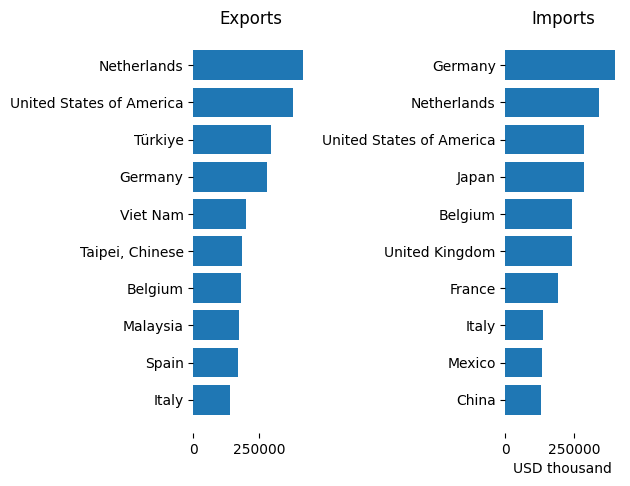

In [7]:
trade_types=list(set(df.Type))
fig,ax=plt.subplots(1,2)
for i in range(len(trade_types)):
    do=df[df.Type==trade_types[i]].sort_values('Values',ascending=False)
    do=do[do.Countries!='World'].head(10)
    ax[i].barh(do['Countries'], do['Values'])
    ax[i].invert_yaxis()
    ax[i].set_title(trade_types[i])
    ax[i].spines[['top','left','right','bottom']].set_visible(False) 
plt.xlabel('USD thousand')
plt.tight_layout(pad=0.5)

In [23]:
list(set(df.Type))

['Imports', 'Exports']